# 20530번 양분 - Gold 1

#### 알고리즘 분류: 트리 , 그래프 탐색 , DFS


##### 풀이 : 정점 과 간선의 갯수가 동일하므로 무조건 하나의 사이클이 존재 , 사이클의 정점을 계산 한 뒤, 사이클의 정점을 루트로 하는 서브트리 구성 ㄱ같은 서브트리면 1 , 다른 서브트리면 2 출력



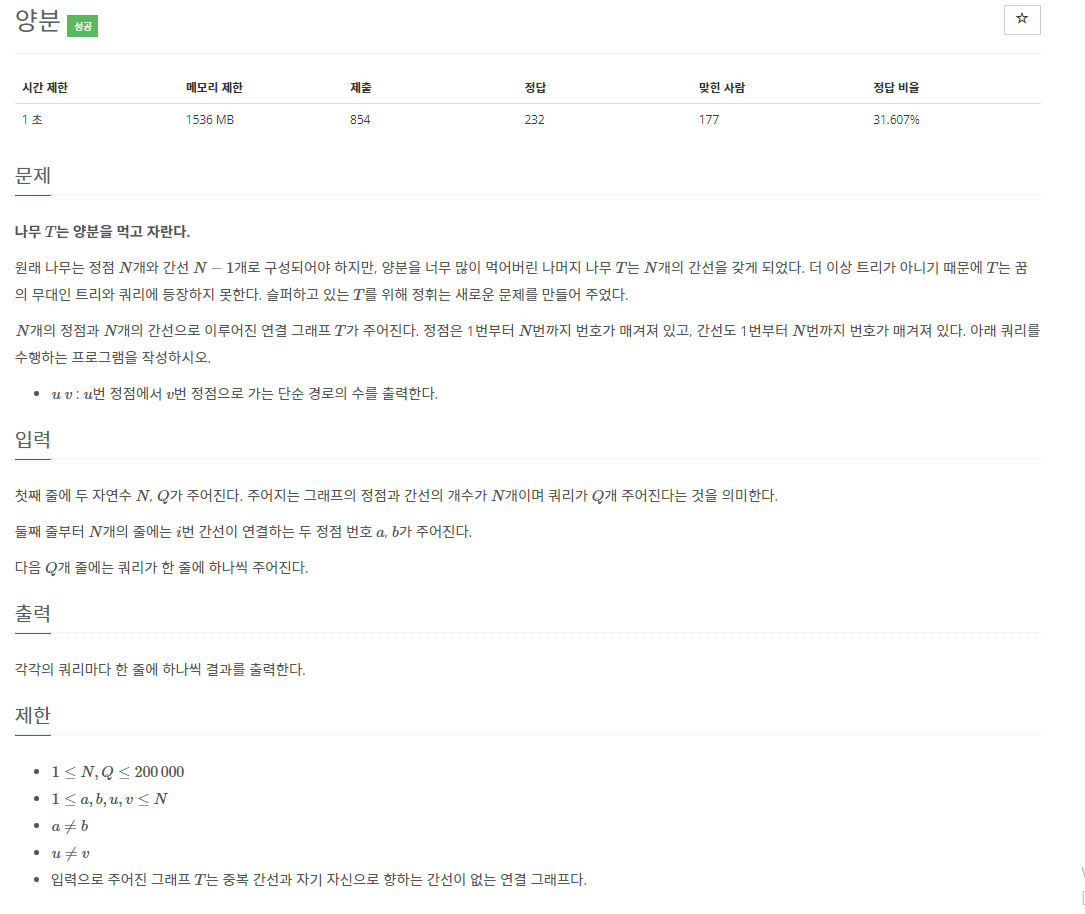

In [ ]:
import sys

input = sys.stdin.readline
n, q = map(int, input().split())
sys.setrecursionlimit(300000)
graph = [[] for _ in range(n)]
for i in range(n):
    a, b = map(int, input().split())
    a, b = a - 1, b - 1
    graph[a].append(b)
    graph[b].append(a)

visit = [False] * n
sub_visit = [False] * n
parent = list(range(n))
isCycleNode = [False] * n
finished = [False] * n
subtree = list(range(n))

cycle = []


def denoteCycle(node, next):
    cycle.append(node)
    isCycleNode[node] = True
    if node == next:
        return

    finished[node] = True
    denoteCycle(parent[node], next)


def dfs(node):
    visit[node] = True

    for next in graph[node]:
        if not visit[next]:
            parent[next] = node
            dfs(next)
        elif not finished[next]:
            if node == next:
                continue
            if next == parent[node]: continue
            denoteCycle(node, next)


def make_subtree(node, i):
    sub_visit[node] = True

    for next in graph[node]:

        if not sub_visit[next] and not isCycleNode[next]:
            subtree[next] = i
            make_subtree(next, i)

dfs(0)
for i in cycle:
    make_subtree(i,i)

for i in range(q):
    a, b = map(int, input().split())
    if subtree[a - 1] == subtree[b - 1]:
        print(1)
    else:
        print(2)
